In [21]:
import numpy as np
from astropy import units as u
import matplotlib.pyplot as plt
from astroquery.gaia import Gaia
from astropy.coordinates import SkyCoord
from gaiadr2ruwetools import ruwetools
from astropy.table import Table

plt.rcParams['font.size'] = 16

In [5]:
catalog = Table.read('all_star_param_catalog_ruwe.tab', format='csv')

In [12]:
colnames = ['source_id', 'bp_rp', 'phot_g_mean_mag', 'parallax',
            'astrometric_chi2_al', 'astrometric_n_good_obs_al', 
            'phot_bp_mean_flux_over_error', 'parallax_over_error',
            'phot_rp_mean_flux_over_error']

In [6]:
uwe = np.sqrt( catalog['astrometric_chi2_al'] / (catalog['astrometric_n_good_obs_al']-5) )

In [7]:
u0fit = ruwetools.U0Interpolator()
u0 = u0fit.get_u0(catalog['phot_g_mean_mag'], 
                  catalog['bp_rp'])

In [8]:
ruwe = uwe/u0

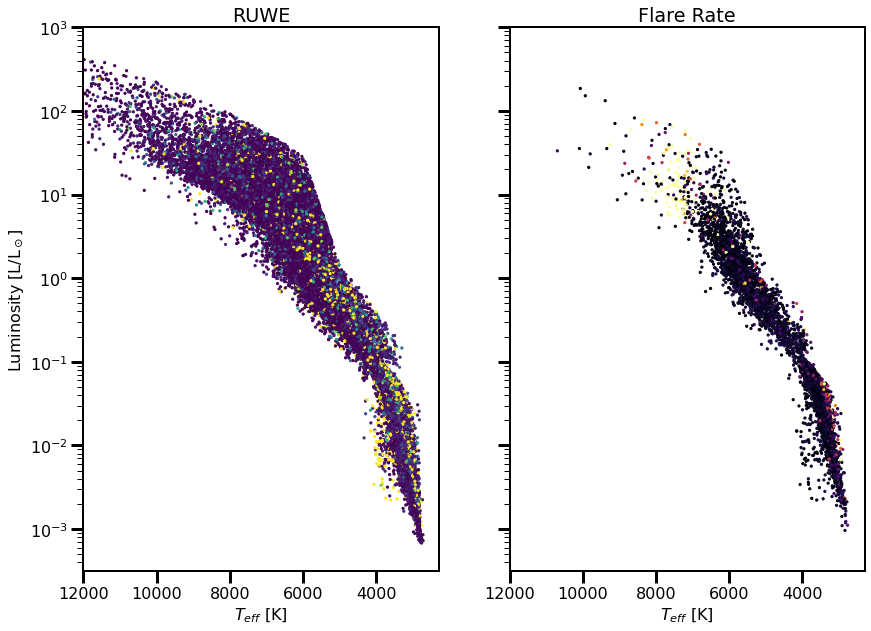

In [61]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(14,10), 
                               sharex=True, sharey=True)

ax1.scatter(catalog['teff'], catalog['lum'], 
            c=ruwe, s=5, vmin=1, vmax=3)
ax1.set_title('RUWE')
#ax1.colorbar(label='RUWE')

inds = np.where((catalog['teff'] > 6000) & 
                (catalog['lum']>3) & 
                (catalog['N_flares_per_day']>2) &
                (ruwe < 1.4))[0]
good_inds = np.delete(np.arange(0,len(catalog),1,dtype=int), inds)
ax2.plot(catalog['teff'][good_inds], catalog['lum'][good_inds], '.',
            c='w', ms=5, alpha=0.1, zorder=0)

good_inds = ruwe > 3
ax2.scatter(catalog['teff'][good_inds], catalog['lum'][good_inds], 
            c=catalog['N_flares_per_day'][good_inds], s=5, vmin=0, vmax=2,
            cmap='inferno', zorder=3)
ax2.set_title('Flare Rate')
#ax2.colorbar(label='Flare Rate')

plt.xlim(12000,2300)
plt.yscale('log')
plt.ylim(10**-3.5, 10**3)
ax1.set_xlabel('$T_{eff}$ [K]')
ax2.set_xlabel('$T_{eff}$ [K]')
ax1.set_ylabel('Luminosity [L/L$_\odot$]');

(array([134., 128., 101.,  84.,  55.,  70.,  60.,  75.,  78.]),
 array([1.        , 1.19581317, 1.42996915, 1.70997595, 2.04481177,
        2.44521285, 2.92401774, 3.49657893, 4.18125515, 5.        ]),
 <BarContainer object of 9 artists>)

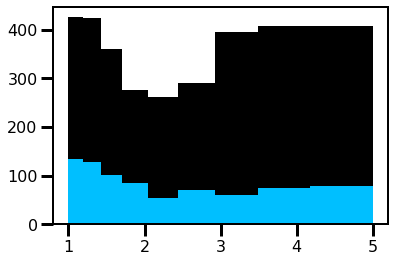

In [53]:
bins = np.logspace(0,np.log10(5),10)
plt.hist(catalog['N_flares_per_day'][ruwe <= 1.5], 
         bins=bins, color='k')
plt.hist(catalog['N_flares_per_day'][ruwe >  1.5], 
         bins=bins, color='deepskyblue')


In [57]:
np.nanmean(catalog['N_flares_per_day'][ruwe >  1.5])

0.3272802774971437

In [56]:
np.nanmean(catalog['N_flares_per_day'][ruwe <=  1.5])

0.3270794672711976